##Emergency vs Non-Emergency Image Classification Project

##Done By: Ashwath Bala S

Table of Contents:

1.Problem Statement

2.Dataset Description

3.Importing the Required Libraries

4.Loading the Dataset

5.Data Pre-Processing

6.Creating training and validation set

##1. Problem Statement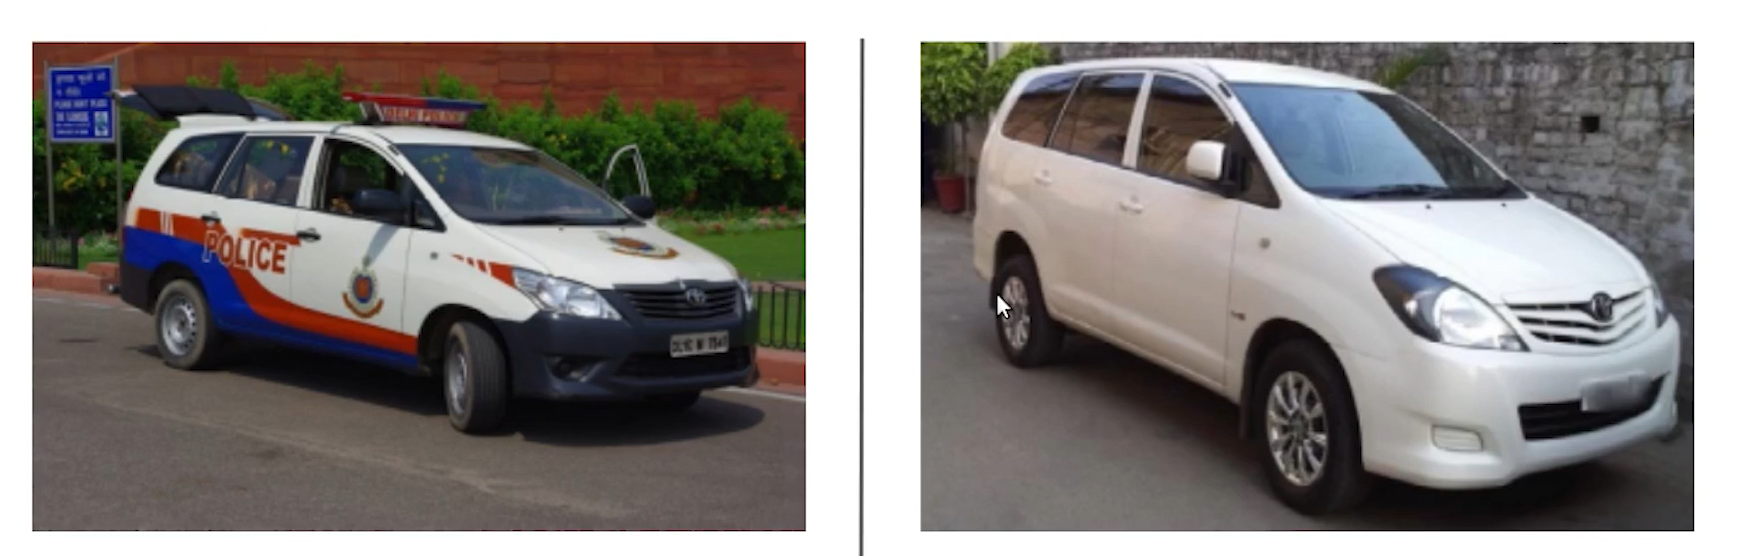

The aim of this project is to build a deep learning model to classify vehicles as Emergency or Non-Emergency.
Accuracy is used as the evaluation metric for this project.



##2. Dataset Description

The Datasets used for this Project are:

(i) Images Folder - Containing 2351 Images of both Emergency and Non-Emergency Vehicles

(ii) emergency_classification.csv - Contains the image name and correct class of 2351 Images

## 3. Importing the Required Libraries

In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer,Dropout,BatchNormalization
from keras.models import Sequential
# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

##4. Loding the Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!unzip /content/drive/My\ Drive/Dataset.zip

Archive:  /content/drive/My Drive/Dataset.zip
   creating: Dataset/
  inflating: Dataset/emergency_classification.csv  
   creating: Dataset/images/
  inflating: Dataset/images/0.jpg    
  inflating: Dataset/images/10.jpg   
  inflating: Dataset/images/1002.jpg  
  inflating: Dataset/images/1006.jpg  
  inflating: Dataset/images/1007.jpg  
  inflating: Dataset/images/1009.jpg  
  inflating: Dataset/images/1013.jpg  
  inflating: Dataset/images/1014.jpg  
  inflating: Dataset/images/1016.jpg  
  inflating: Dataset/images/1019.jpg  
  inflating: Dataset/images/102.jpg  
  inflating: Dataset/images/1020.jpg  
  inflating: Dataset/images/1022.jpg  
  inflating: Dataset/images/1023.jpg  
  inflating: Dataset/images/1026.jpg  
  inflating: Dataset/images/1031.jpg  
  inflating: Dataset/images/1035.jpg  
  inflating: Dataset/images/1036.jpg  
  inflating: Dataset/images/1037.jpg  
  inflating: Dataset/images/104.jpg  
  inflating: Dataset/images/1040.jpg  
  inflating: Dataset/images/1041.jpg

In [4]:
# reading the csv file
data = pd.read_csv('Dataset/emergency_classification.csv')

In [7]:
# creating random number generator
seed = 42
rng = np.random.RandomState(seed)

In [6]:
# looking at first five rows of the data
data.head()

,image_names,emergency_or_not
0,0.jpg,1
1,1.jpg,1
2,2.jpg,1
3,3.jpg,1
4,4.jpg,1


In [8]:
# load images and store it in numpy array

# empty list to store the images
X = []
# iterating over each image
for img_name in data.image_names:
    # loading the image using its name
    img = plt.imread('Dataset/images/' + img_name)
    # saving each image in the list
    X.append(img)

# converting the list of images into array
X=np.array(X)

# storing the target variable in separate variable
y = data.emergency_or_not.values

##5. Data Pre-Processing

In [9]:
# converting 3 dimensional image to 1 dimensional image
X = X.reshape(X.shape[0], 224*224*3)
X.shape

(2352, 150528)

In [10]:
# normalizing the pixel values
X = X / X.max()

# minimum and maximum pixel values of images after normalizing
X.min(), X.max()

(0.0, 1.0)

## 6. Creating training and validation set

In [11]:
# creating a training and validation set
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.3, random_state=seed)

In [12]:
# shape of training and validation set
(X_train.shape, y_train.shape), (X_valid.shape, y_valid.shape)

(((1646, 150528), (1646,)), ((706, 150528), (706,)))

## 7. Defining the model architecture

In [13]:
model = Sequential()
model.add(InputLayer(input_shape=(224*224*3,)))

# First dense layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Second dense layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Third dense layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Fourth dense layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │      15,052,900 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │          10,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 100)                 │             400 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,084,901 (57.54 MB)

 Trainable params: 15,084,101 (57.54 MB)

 Non-trainable params: 800 (3.12 KB)

## 8. Model Compiling

In [14]:
# defining the adam optimizer and setting the learning rate as 10^-5
adam = Adam(learning_rate=1e-5)

In [15]:
# compiling the model

# defining loss as binary crossentropy
# defining optimizer as Adam
# defining metrics as accuracy

model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

##Early Stopping

In [16]:
# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.01, patience=10, mode='min')

##Model Checkpointing

In [18]:
from keras.callbacks import ModelCheckpoint

# Define the filepath for saving the best model weights
checkpoint_filepath = 'best_model.weights.h5'

# Create a ModelCheckpoint callback
model_checkpoint = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,    # Save only the model weights
    monitor='val_loss',       # Monitor validation loss
    mode='min',               # Mode can be 'min' or 'max' depending on what you are monitoring
    save_best_only=True,       # Save only the best model (based on the monitored quantity)
    verbose=1                 # Print messages
)

## 9. Model Training

In [19]:
# training the model for 100 epochs

model_history = model.fit(X_train, y_train, epochs=100, batch_size=128,validation_data=(X_valid,y_valid),callbacks=[model_checkpoint, early_stopping])

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.4859 - loss: 1.0205
Epoch 1: val_loss improved from inf to 0.68176, saving model to best_model.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 848ms/step - accuracy: 0.4869 - loss: 1.0199 - val_accuracy: 0.5581 - val_loss: 0.6818
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.5153 - loss: 1.0781
Epoch 2: val_loss improved from 0.68176 to 0.67460, saving model to best_model.weights.h5
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 482ms/step - accuracy: 0.5158 - loss: 1.0769 - val_accuracy: 0.5623 - val_loss: 0.6746
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5388 - loss: 0.9396
Epoch 3: val_loss did not improve from 0.67460
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - accuracy: 0.5389 - loss: 0.9398 - val_accuracy: 0.5595 - val_loss: 0.6867
Epoch 4/100
12/13 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5731 - loss: 0.8980
Epoch 4: val_loss improved from 0.67460 to 0.67050, saving model to best_model.we

## 10. Evaluating model performance

In [20]:
# Model Checkpointing

# Loading the best model
model.load_weights(checkpoint_filepath)

In [21]:
# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_valid, y_valid, verbose=1)
print(f'Validation Loss: {val_loss}')
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.6512 - loss: 0.5981
Validation Loss: 0.5731626749038696
Validation Accuracy: 67.71%


##In this Project, we have built a deep learning model for classifying images as Emergency or Non-Emergency